# Stock Market Analysis with technical indicators and preditions

In [1]:
# Import Modules
import os
import sys

import json
from pathlib import Path
import numpy as np
import pandas as pd
import os
import random
import copy
import matplotlib.pyplot as plt
import pandas

In [2]:
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
yf.pdr_override()

## Setup start and end time to read the data

In [3]:
end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)
print(start,' ', end)
stock_list = ['AMAT','LRCX','WOLF','KLAC','AAPL', 'GOOG', 'MSFT', 'AMZN']


2013-04-28 00:00:00   2023-04-28 11:42:03.268527


## Pull data from yfinance and store Data in a dataframe. Add Label column, configure Data column.

In [4]:
data = []
for stock in stock_list:
    df = yf.download(stock, start, end)
    df = df.reset_index()
    df['Label'] = stock
    df['Date'] = pd.to_datetime(df['Date'])
    data.append(df)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Examine Data

In [5]:
data[0].head()

Date   Open   High    Low  Close  Adj Close    Volume Label
0 2013-04-29  14.15  14.44  14.07  14.40  12.384822  16446800  AMAT
1 2013-04-30  14.37  14.51  14.29  14.51  12.479425  10094900  AMAT
2 2013-05-01  14.50  14.75  14.44  14.47  12.445022  13788200  AMAT
3 2013-05-02  14.47  14.80  14.41  14.79  12.720244  14534600  AMAT
4 2013-05-03  14.89  15.18  14.79  14.83  12.754645  15303800  AMAT

In [31]:
data[1].tail()

Date        Open        High         Low       Close   Adj Close  \
2513 2023-04-21  524.190002  524.330017  513.830017  517.190002  517.190002   
2514 2023-04-24  515.369995  518.080017  506.380005  514.380005  514.380005   
2515 2023-04-25  511.549988  516.619995  499.459991  499.720001  499.720001   
2516 2023-04-26  503.250000  507.709991  495.160004  497.399994  497.399994   
2517 2023-04-27  503.549988  519.510010  493.420013  518.890015  518.890015   

       Volume Label  
2513  1438700  LRCX  
2514  1024700  LRCX  
2515  1371100  LRCX  
2516  1294900  LRCX  
2517  1981800  LRCX

In [7]:
print(len(data))

8


## Add Technical Indicators to the dataframe

Calculate these technical indicators
- RSI
- Volume (plain)
- Bollinger Bands
- Aroon Oscillator
- Price Volume Trend
- acceleration bands

In [8]:
TechIndicator = copy.deepcopy(data)

## Calculation of Relative Strength Index (RSI)

### Relative Strength Index
### PriceUp = Price > 0
### PriceDown = Price < 0
### Avg(PriceUp)/(Avg(PriceUP)+Avg(PriceDown)*100
### Where: PriceUp(t)=1*(Price(t)-Price(t-1)){Price(t)- Price(t-1)>0};
### PriceDown(t)=-1*(Price(t)-Price(t-1)){Price(t)- Price(t-1)<0};


In [9]:
def rsi(values):
    up = values[values>0].mean()
    down = -1*values[values<0].mean()
    return 100 * up / (up + down)


## Add Momentum_1D column for all stocks.
## Momentum_1D = P(t) - P(t-1)

In [10]:

for stock in range(len(TechIndicator)):
    TechIndicator[stock]['Momentum_1D'] = (TechIndicator[stock]['Close']-TechIndicator[stock]['Close'].shift(1)).fillna(0)
    TechIndicator[stock]['RSI_14D'] = TechIndicator[stock]['Momentum_1D'].rolling(center=False, window=14).apply(rsi).fillna(0)
TechIndicator[1].tail(5)

Date        Open        High         Low       Close   Adj Close  \
2513 2023-04-21  524.190002  524.330017  513.830017  517.190002  517.190002   
2514 2023-04-24  515.369995  518.080017  506.380005  514.380005  514.380005   
2515 2023-04-25  511.549988  516.619995  499.459991  499.720001  499.720001   
2516 2023-04-26  503.250000  507.709991  495.160004  497.399994  497.399994   
2517 2023-04-27  503.549988  519.510010  493.420013  518.890015  518.890015   

       Volume Label  Momentum_1D    RSI_14D  
2513  1438700  LRCX    -9.330017  44.825934  
2514  1024700  LRCX    -2.809998  47.007972  
2515  1371100  LRCX   -14.660004  48.040138  
2516  1294900  LRCX    -2.320007  51.813127  
2517  1981800  LRCX    21.490021  59.707609

In [11]:
TechIndicator[1].head(5)

Date       Open       High        Low      Close  Adj Close   Volume  \
0 2013-04-29  45.700001  45.869999  45.419998  45.580002  39.832855  3483200   
1 2013-04-30  45.570000  46.389999  45.410000  46.220001  40.392151  3481100   
2 2013-05-01  45.950001  46.139999  45.439999  45.599998  39.850319  2560700   
3 2013-05-02  45.950001  46.360001  45.470001  45.650002  39.894028  2559900   
4 2013-05-03  46.020000  46.450001  45.880001  46.009998  40.208626  2657900   

  Label  Momentum_1D  RSI_14D  
0  LRCX     0.000000      0.0  
1  LRCX     0.639999      0.0  
2  LRCX    -0.620003      0.0  
3  LRCX     0.050003      0.0  
4  LRCX     0.359997      0.0

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import numpy as np

In [13]:
#Cleanup the 'Volume' column.
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['Volume_plain'] = TechIndicator[stock]['Volume'].fillna(0)
TechIndicator[0].tail()

Date        Open        High         Low       Close   Adj Close  \
2513 2023-04-21  113.470001  114.099998  112.209999  113.459999  113.459999   
2514 2023-04-24  113.489998  113.940002  112.540001  113.610001  113.610001   
2515 2023-04-25  112.500000  113.660004  110.419998  110.610001  110.610001   
2516 2023-04-26  111.160004  111.500000  109.820000  110.309998  110.309998   
2517 2023-04-27  111.300003  112.180000  109.150002  111.680000  111.680000   

       Volume Label  Momentum_1D    RSI_14D  Volume_plain  
2513  4516200  AMAT    -0.930000  59.830297       4516200  
2514  3218100  AMAT     0.150002  51.784035       3218100  
2515  6282600  AMAT    -3.000000  50.508170       6282600  
2516  6245800  AMAT    -0.300003  54.721394       6245800  
2517  9441000  AMAT     1.370003  57.155456       9441000

## Calculation of Bollinger Bands
## Calculate average closing value for given period(i.e. 30 days)
## Calculate standard deviation of closing value for the given period(i.e. 30 days)
## Calculate the upper band
* upperband = average + standard deviation * number of standard deviations(i.e. 3)

## Calculate the lower band
* lowerband = average - standard deviation * number of standard deviations(i.e. 3)

In [14]:
def bbands(price, length=30, numsd=3):    
    ave = price.rolling(window = length, center = False).mean()    
    sd = price.rolling(window = length, center = False).std()
    upband = ave + (sd*numsd)
    dnband = ave - (sd*numsd)
    return np.round(ave,3), np.round(upband,3), np.round(dnband,3)

In [15]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['BB_Middle_Band'], TechIndicator[stock]['BB_Upper_Band'], TechIndicator[stock]['BB_Lower_Band'] = bbands(TechIndicator[stock]['Close'], length=30, numsd=3)
    TechIndicator[stock]['BB_Middle_Band'] = TechIndicator[stock]['BB_Middle_Band'].fillna(0)
    TechIndicator[stock]['BB_Upper_Band'] = TechIndicator[stock]['BB_Upper_Band'].fillna(0)
    TechIndicator[stock]['BB_Lower_Band'] = TechIndicator[stock]['BB_Lower_Band'].fillna(0)
TechIndicator[0].tail()

Date        Open        High         Low       Close   Adj Close  \
2513 2023-04-21  113.470001  114.099998  112.209999  113.459999  113.459999   
2514 2023-04-24  113.489998  113.940002  112.540001  113.610001  113.610001   
2515 2023-04-25  112.500000  113.660004  110.419998  110.610001  110.610001   
2516 2023-04-26  111.160004  111.500000  109.820000  110.309998  110.309998   
2517 2023-04-27  111.300003  112.180000  109.150002  111.680000  111.680000   

       Volume Label  Momentum_1D    RSI_14D  Volume_plain  BB_Middle_Band  \
2513  4516200  AMAT    -0.930000  59.830297       4516200         117.601   
2514  3218100  AMAT     0.150002  51.784035       3218100         117.575   
2515  6282600  AMAT    -3.000000  50.508170       6282600         117.400   
2516  6245800  AMAT    -0.300003  54.721394       6245800         117.066   
2517  9441000  AMAT     1.370003  57.155456       9441000         116.839   

      BB_Upper_Band  BB_Lower_Band  
2513        129.620        105.582  
2514        129.666        105.484  
2515        130.051        104.750  
2516        130.177        103.955  
2517        130.249        103.430

## Calculation of Aroon Oscillator
###  Aroon-Up = (25 – Number of Days Since Recent 25-day High / 25)* 100

### Aroon-Down = (25 – Number of Days Since Recent 25-day Low / 25) * 100


In [16]:
def Aroon_Oscillator(df, tf=25):
    aroonup = []
    aroondown = []
    x = tf
    while x< len(df['Date']):
        aroon_up = ((df['High'][x-tf:x].tolist().index(max(df['High'][x-tf:x])))/float(tf))*100
        aroon_down = ((df['Low'][x-tf:x].tolist().index(min(df['Low'][x-tf:x])))/float(tf))*100
        aroonup.append(aroon_up)
        aroondown.append(aroon_down)
        x+=1
    return aroonup, aroondown

In [17]:
for stock in range(len(TechIndicator)):
    listofzeros = [0] * 25
    up, down = Aroon_Oscillator(TechIndicator[stock])
    aroon_list = [x - y for x, y in zip(up,down)]
    if len(aroon_list)==0:
        aroon_list = [0] * TechIndicator[stock].shape[0]
        TechIndicator[stock]['Aroon_Oscillator'] = aroon_list
    else:
        TechIndicator[stock]['Aroon_Oscillator'] = listofzeros+aroon_list


In [18]:
TechIndicator[0].head()

Date   Open   High    Low  Close  Adj Close    Volume Label  \
0 2013-04-29  14.15  14.44  14.07  14.40  12.384822  16446800  AMAT   
1 2013-04-30  14.37  14.51  14.29  14.51  12.479425  10094900  AMAT   
2 2013-05-01  14.50  14.75  14.44  14.47  12.445022  13788200  AMAT   
3 2013-05-02  14.47  14.80  14.41  14.79  12.720244  14534600  AMAT   
4 2013-05-03  14.89  15.18  14.79  14.83  12.754645  15303800  AMAT   

   Momentum_1D  RSI_14D  Volume_plain  BB_Middle_Band  BB_Upper_Band  \
0     0.000000      0.0      16446800             0.0            0.0   
1     0.110001      0.0      10094900             0.0            0.0   
2    -0.040000      0.0      13788200             0.0            0.0   
3     0.320000      0.0      14534600             0.0            0.0   
4     0.040000      0.0      15303800             0.0            0.0   

   BB_Lower_Band  Aroon_Oscillator  
0            0.0               0.0  
1            0.0               0.0  
2            0.0               0.0  
3            0.0               0.0  
4            0.0               0.0

In [19]:
TechIndicator[0].tail()

Date        Open        High         Low       Close   Adj Close  \
2513 2023-04-21  113.470001  114.099998  112.209999  113.459999  113.459999   
2514 2023-04-24  113.489998  113.940002  112.540001  113.610001  113.610001   
2515 2023-04-25  112.500000  113.660004  110.419998  110.610001  110.610001   
2516 2023-04-26  111.160004  111.500000  109.820000  110.309998  110.309998   
2517 2023-04-27  111.300003  112.180000  109.150002  111.680000  111.680000   

       Volume Label  Momentum_1D    RSI_14D  Volume_plain  BB_Middle_Band  \
2513  4516200  AMAT    -0.930000  59.830297       4516200         117.601   
2514  3218100  AMAT     0.150002  51.784035       3218100         117.575   
2515  6282600  AMAT    -3.000000  50.508170       6282600         117.400   
2516  6245800  AMAT    -0.300003  54.721394       6245800         117.066   
2517  9441000  AMAT     1.370003  57.155456       9441000         116.839   

      BB_Upper_Band  BB_Lower_Band  Aroon_Oscillator  
2513        129.620        105.582             -72.0  
2514        129.666        105.484             -72.0  
2515        130.051        104.750             -72.0  
2516        130.177        103.955             -72.0  
2517        130.249        103.430             -64.0

## Calculation of Price Volume Trend
### PVT =  [((CurrentClose - PreviousClose) / PreviousClose) x Volume]
### PVT = PVT+ PreviousPVT

In [20]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]["PVT"] = (TechIndicator[stock]['Momentum_1D']/ TechIndicator[stock]['Close'].shift(1))*TechIndicator[stock]['Volume_plain']
    TechIndicator[stock]["PVT"] = TechIndicator[stock]["PVT"]+TechIndicator[stock]["PVT"].shift(1)
    TechIndicator[stock]["PVT"] = TechIndicator[stock]["PVT"].fillna(0)
TechIndicator[0].tail()

Date        Open        High         Low       Close   Adj Close  \
2513 2023-04-21  113.470001  114.099998  112.209999  113.459999  113.459999   
2514 2023-04-24  113.489998  113.940002  112.540001  113.610001  113.610001   
2515 2023-04-25  112.500000  113.660004  110.419998  110.610001  110.610001   
2516 2023-04-26  111.160004  111.500000  109.820000  110.309998  110.309998   
2517 2023-04-27  111.300003  112.180000  109.150002  111.680000  111.680000   

       Volume Label  Momentum_1D    RSI_14D  Volume_plain  BB_Middle_Band  \
2513  4516200  AMAT    -0.930000  59.830297       4516200         117.601   
2514  3218100  AMAT     0.150002  51.784035       3218100         117.575   
2515  6282600  AMAT    -3.000000  50.508170       6282600         117.400   
2516  6245800  AMAT    -0.300003  54.721394       6245800         117.066   
2517  9441000  AMAT     1.370003  57.155456       9441000         116.839   

      BB_Upper_Band  BB_Lower_Band  Aroon_Oscillator            PVT  
2513        129.620        105.582             -72.0  282595.971664  
2514        129.666        105.484             -72.0  -32462.547126  
2515        130.051        104.750             -72.0 -161644.589417  
2516        130.177        103.955             -72.0 -182839.359605  
2517        130.249        103.430             -64.0  100312.929344

### Calculation of Acceleration Bands

lower envelope bands around a simple moving average. 

In [21]:
def abands(df):
    df['AB_Middle_Band'] = df['Close'].rolling(window = 20, center=False).mean()
    df['aupband'] = df['High'] * (1 + 4 * (df['High']-df['Low'])/(df['High']+df['Low']))
    df['AB_Upper_Band'] = df['aupband'].rolling(window=20, center=False).mean()
    df['adownband'] = df['Low'] * (1 - 4 * (df['High']-df['Low'])/(df['High']+df['Low']))
    df['AB_Lower_Band'] = df['adownband'].rolling(window=20, center=False).mean()

In [22]:
for stock in range(len(TechIndicator)):
    abands(TechIndicator[stock])
    TechIndicator[stock] = TechIndicator[stock].fillna(0)
TechIndicator[0].tail()

Date        Open        High         Low       Close   Adj Close  \
2513 2023-04-21  113.470001  114.099998  112.209999  113.459999  113.459999   
2514 2023-04-24  113.489998  113.940002  112.540001  113.610001  113.610001   
2515 2023-04-25  112.500000  113.660004  110.419998  110.610001  110.610001   
2516 2023-04-26  111.160004  111.500000  109.820000  110.309998  110.309998   
2517 2023-04-27  111.300003  112.180000  109.150002  111.680000  111.680000   

       Volume Label  Momentum_1D    RSI_14D  ...  BB_Middle_Band  \
2513  4516200  AMAT    -0.930000  59.830297  ...         117.601   
2514  3218100  AMAT     0.150002  51.784035  ...         117.575   
2515  6282600  AMAT    -3.000000  50.508170  ...         117.400   
2516  6245800  AMAT    -0.300003  54.721394  ...         117.066   
2517  9441000  AMAT     1.370003  57.155456  ...         116.839   

      BB_Upper_Band  BB_Lower_Band  Aroon_Oscillator            PVT  \
2513        129.620        105.582             -72.0  282595.971664   
2514        129.666        105.484             -72.0  -32462.547126   
2515        130.051        104.750             -72.0 -161644.589417   
2516        130.177        103.955             -72.0 -182839.359605   
2517        130.249        103.430             -64.0  100312.929344   

      AB_Middle_Band     aupband  AB_Upper_Band   adownband  AB_Lower_Band  
2513        116.3730  117.911565     124.292047  108.461568     108.592045  
2514        116.0770  116.757314     123.610016  109.757306     108.577513  
2515        115.6640  120.233710     123.303744  104.033683     108.126240  
2516        115.3595  114.885506     122.741859  106.485504     108.014354  
2517        114.9510  118.322959     122.236917  103.172965     107.664413  

[5 rows x 21 columns]

## Cleanup the tables

In [23]:
columns2Drop = ['Momentum_1D', 'aupband', 'adownband']
for stock in range(len(TechIndicator)):
    TechIndicator[stock] = TechIndicator[stock].drop(labels = columns2Drop, axis=1)
TechIndicator[0].head()

Date   Open   High    Low  Close  Adj Close    Volume Label  RSI_14D  \
0 2013-04-29  14.15  14.44  14.07  14.40  12.384822  16446800  AMAT      0.0   
1 2013-04-30  14.37  14.51  14.29  14.51  12.479425  10094900  AMAT      0.0   
2 2013-05-01  14.50  14.75  14.44  14.47  12.445022  13788200  AMAT      0.0   
3 2013-05-02  14.47  14.80  14.41  14.79  12.720244  14534600  AMAT      0.0   
4 2013-05-03  14.89  15.18  14.79  14.83  12.754645  15303800  AMAT      0.0   

   Volume_plain  BB_Middle_Band  BB_Upper_Band  BB_Lower_Band  \
0      16446800             0.0            0.0            0.0   
1      10094900             0.0            0.0            0.0   
2      13788200             0.0            0.0            0.0   
3      14534600             0.0            0.0            0.0   
4      15303800             0.0            0.0            0.0   

   Aroon_Oscillator            PVT  AB_Middle_Band  AB_Upper_Band  \
0               0.0       0.000000             0.0            0.0   
1               0.0       0.000000             0.0            0.0   
2               0.0   39104.086352             0.0            0.0   
3               0.0  283418.135436             0.0            0.0   
4               0.0  362817.846643             0.0            0.0   

   AB_Lower_Band  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0

# Visualization of technical indicators

In [24]:
# Index the Data column for visulization
for stock in range(len(TechIndicator)):
    TechIndicator[stock].index = TechIndicator[stock]['Date']
    TechIndicator[stock] = TechIndicator[stock].drop(labels = ['Date'], axis = 1)


In [25]:
TechIndicator[0].head()

Open   High    Low  Close  Adj Close    Volume Label  RSI_14D  \
Date                                                                         
2013-04-29  14.15  14.44  14.07  14.40  12.384822  16446800  AMAT      0.0   
2013-04-30  14.37  14.51  14.29  14.51  12.479425  10094900  AMAT      0.0   
2013-05-01  14.50  14.75  14.44  14.47  12.445022  13788200  AMAT      0.0   
2013-05-02  14.47  14.80  14.41  14.79  12.720244  14534600  AMAT      0.0   
2013-05-03  14.89  15.18  14.79  14.83  12.754645  15303800  AMAT      0.0   

            Volume_plain  BB_Middle_Band  BB_Upper_Band  BB_Lower_Band  \
Date                                                                     
2013-04-29      16446800             0.0            0.0            0.0   
2013-04-30      10094900             0.0            0.0            0.0   
2013-05-01      13788200             0.0            0.0            0.0   
2013-05-02      14534600             0.0            0.0            0.0   
2013-05-03      15303800             0.0            0.0            0.0   

            Aroon_Oscillator            PVT  AB_Middle_Band  AB_Upper_Band  \
Date                                                                         
2013-04-29               0.0       0.000000             0.0            0.0   
2013-04-30               0.0       0.000000             0.0            0.0   
2013-05-01               0.0   39104.086352             0.0            0.0   
2013-05-02               0.0  283418.135436             0.0            0.0   
2013-05-03               0.0  362817.846643             0.0            0.0   

            AB_Lower_Band  
Date                       
2013-04-29            0.0  
2013-04-30            0.0  
2013-05-01            0.0  
2013-05-02            0.0  
2013-05-03            0.0

## Plot Relative Strength Index(RSI)

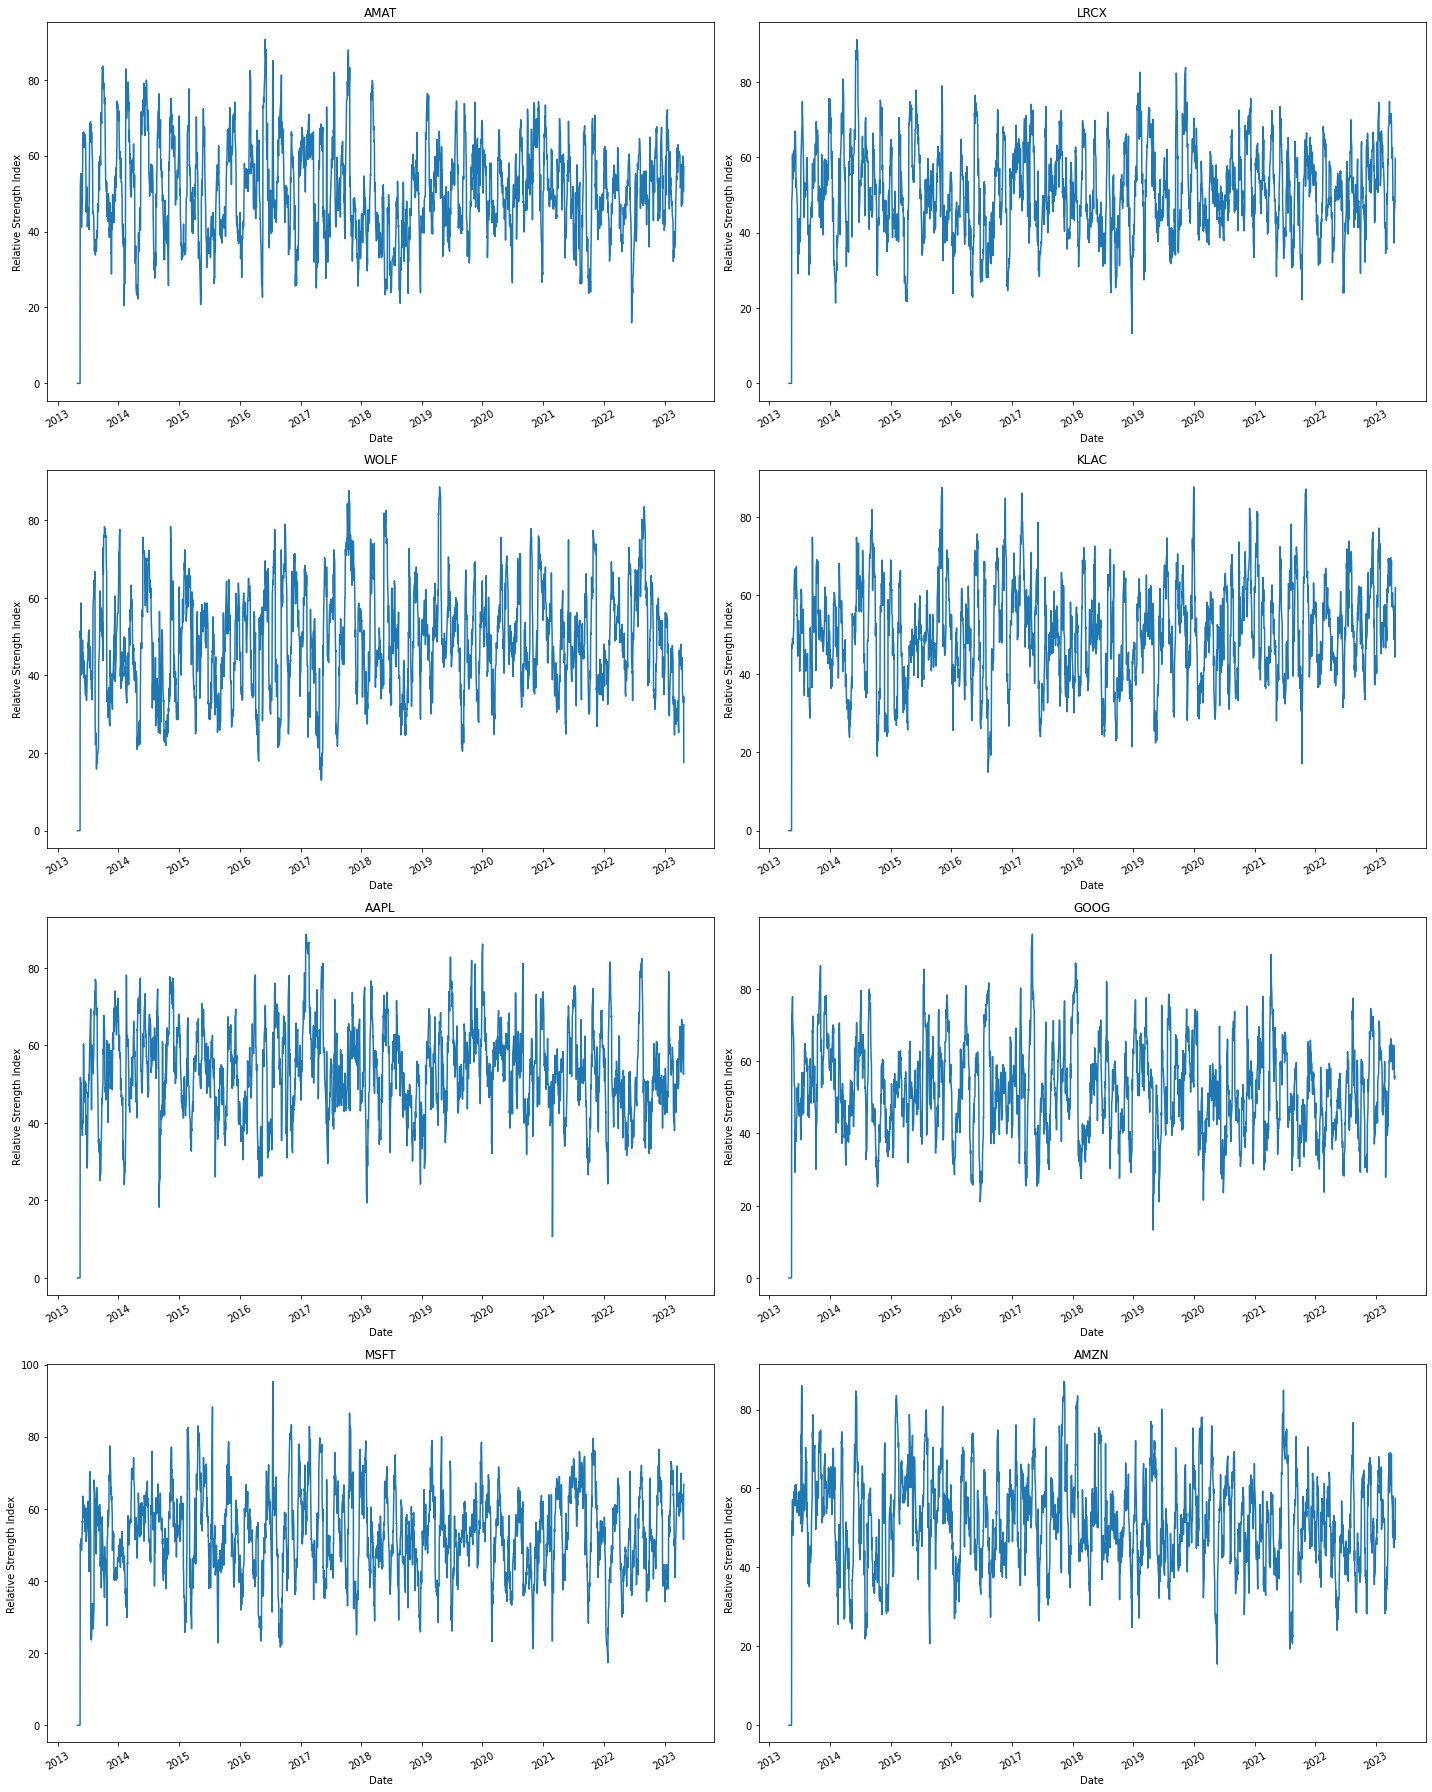

In [26]:
%matplotlib inline
fig = plt.figure(figsize=(20,25))
for i in range(len(TechIndicator)):
    ax = plt.subplot(4,2,i+1)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['RSI_14D'])
    ax.set_title(str(TechIndicator[i]['Label'][0]))
    ax.set_xlabel("Date")
    ax.set_ylabel("Relative Strength Index")
    plt.xticks(rotation=30)
fig.tight_layout()

## Plot Plain Volume  

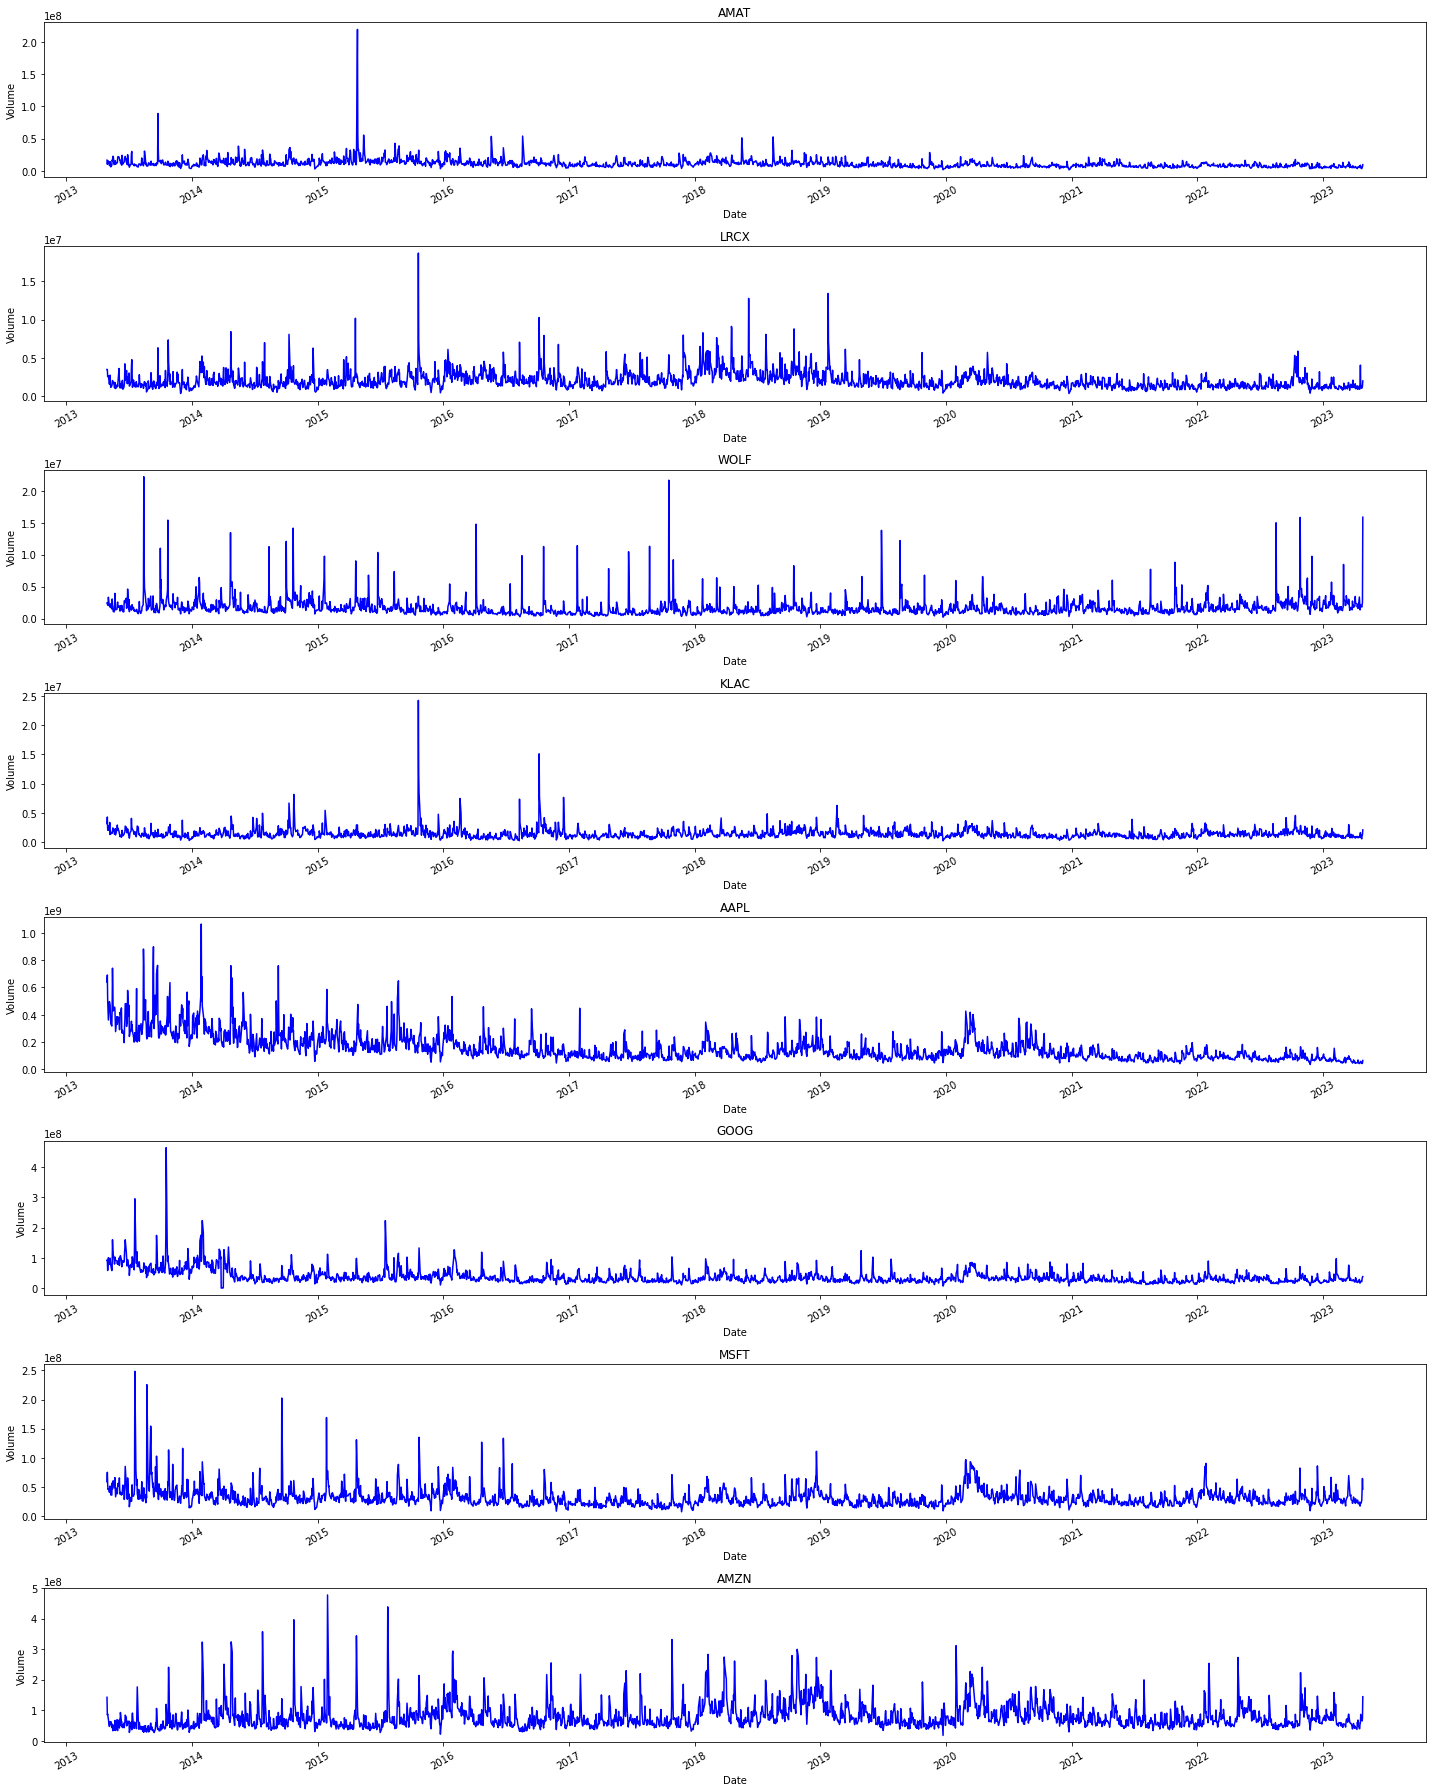

In [27]:
fig = plt.figure(figsize=(20,25))
for i in range(len(TechIndicator)):
    ax = plt.subplot(len(TechIndicator),1,i+1)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Volume_plain'], 'b')
    ax.set_title(str(TechIndicator[i]['Label'][0]))
    ax.set_xlabel("Date")
    ax.set_ylabel("Volume")
    plt.xticks(rotation=30)
fig.tight_layout()

## Plot Bollinger Bands

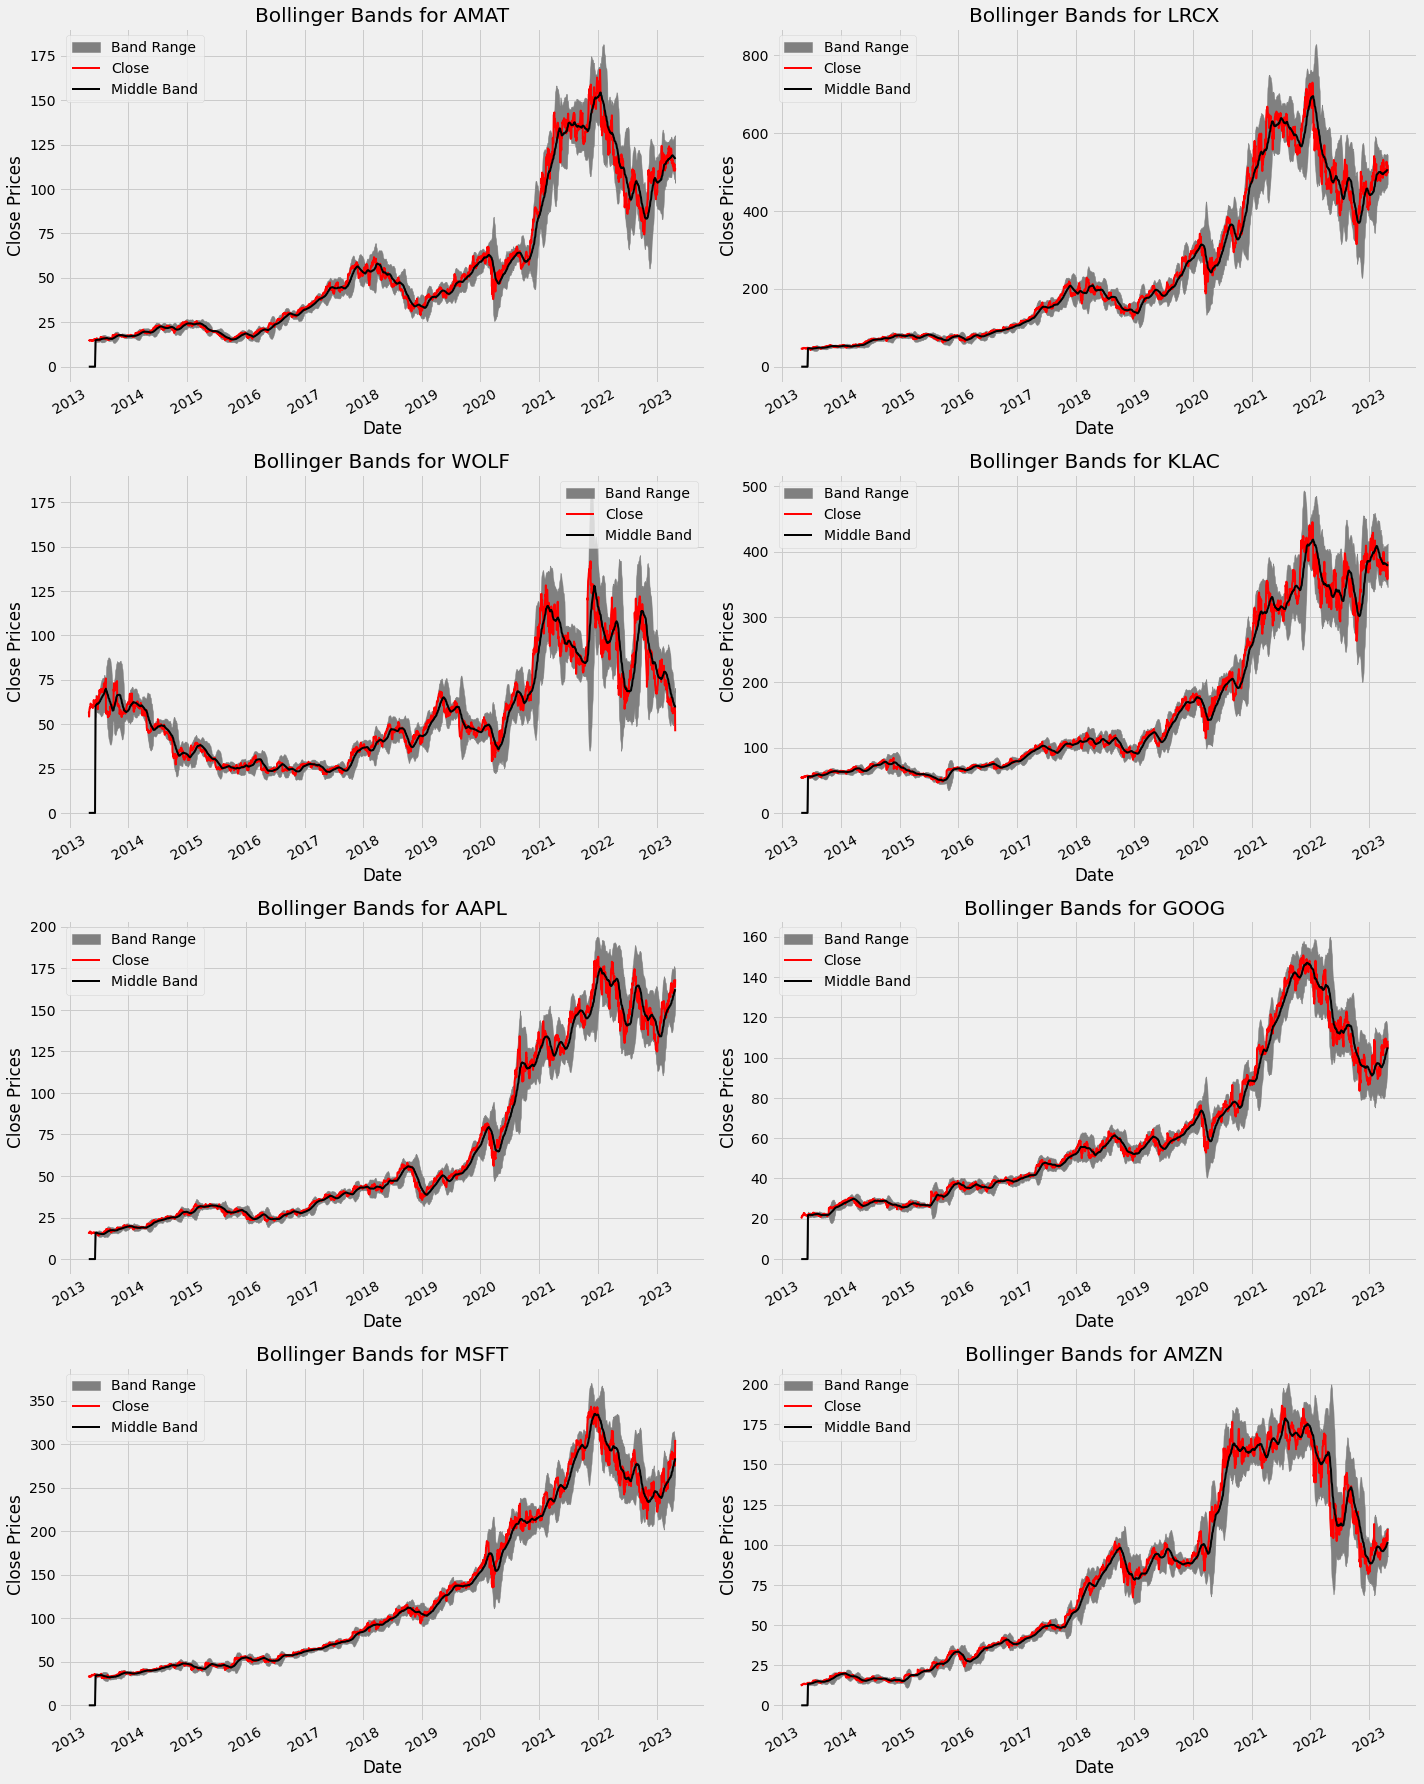

In [28]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(20,25))
for i in range(len(TechIndicator)):
    ax = plt.subplot(4,2,i+1)
    ax.fill_between(TechIndicator[i].index, TechIndicator[i]['BB_Upper_Band'], TechIndicator[i]['BB_Lower_Band'], color='grey', label="Band Range")
    # Plot Adjust Closing Price and Moving Averages
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Close'], color='red', lw=2, label="Close")
    ax.plot(TechIndicator[i].index, TechIndicator[i]['BB_Middle_Band'], color='black', lw=2, label="Middle Band")
    ax.set_title("Bollinger Bands for " + str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Prices")
    plt.xticks(rotation=30)
fig.tight_layout()


# Plot Aroon Oscillators

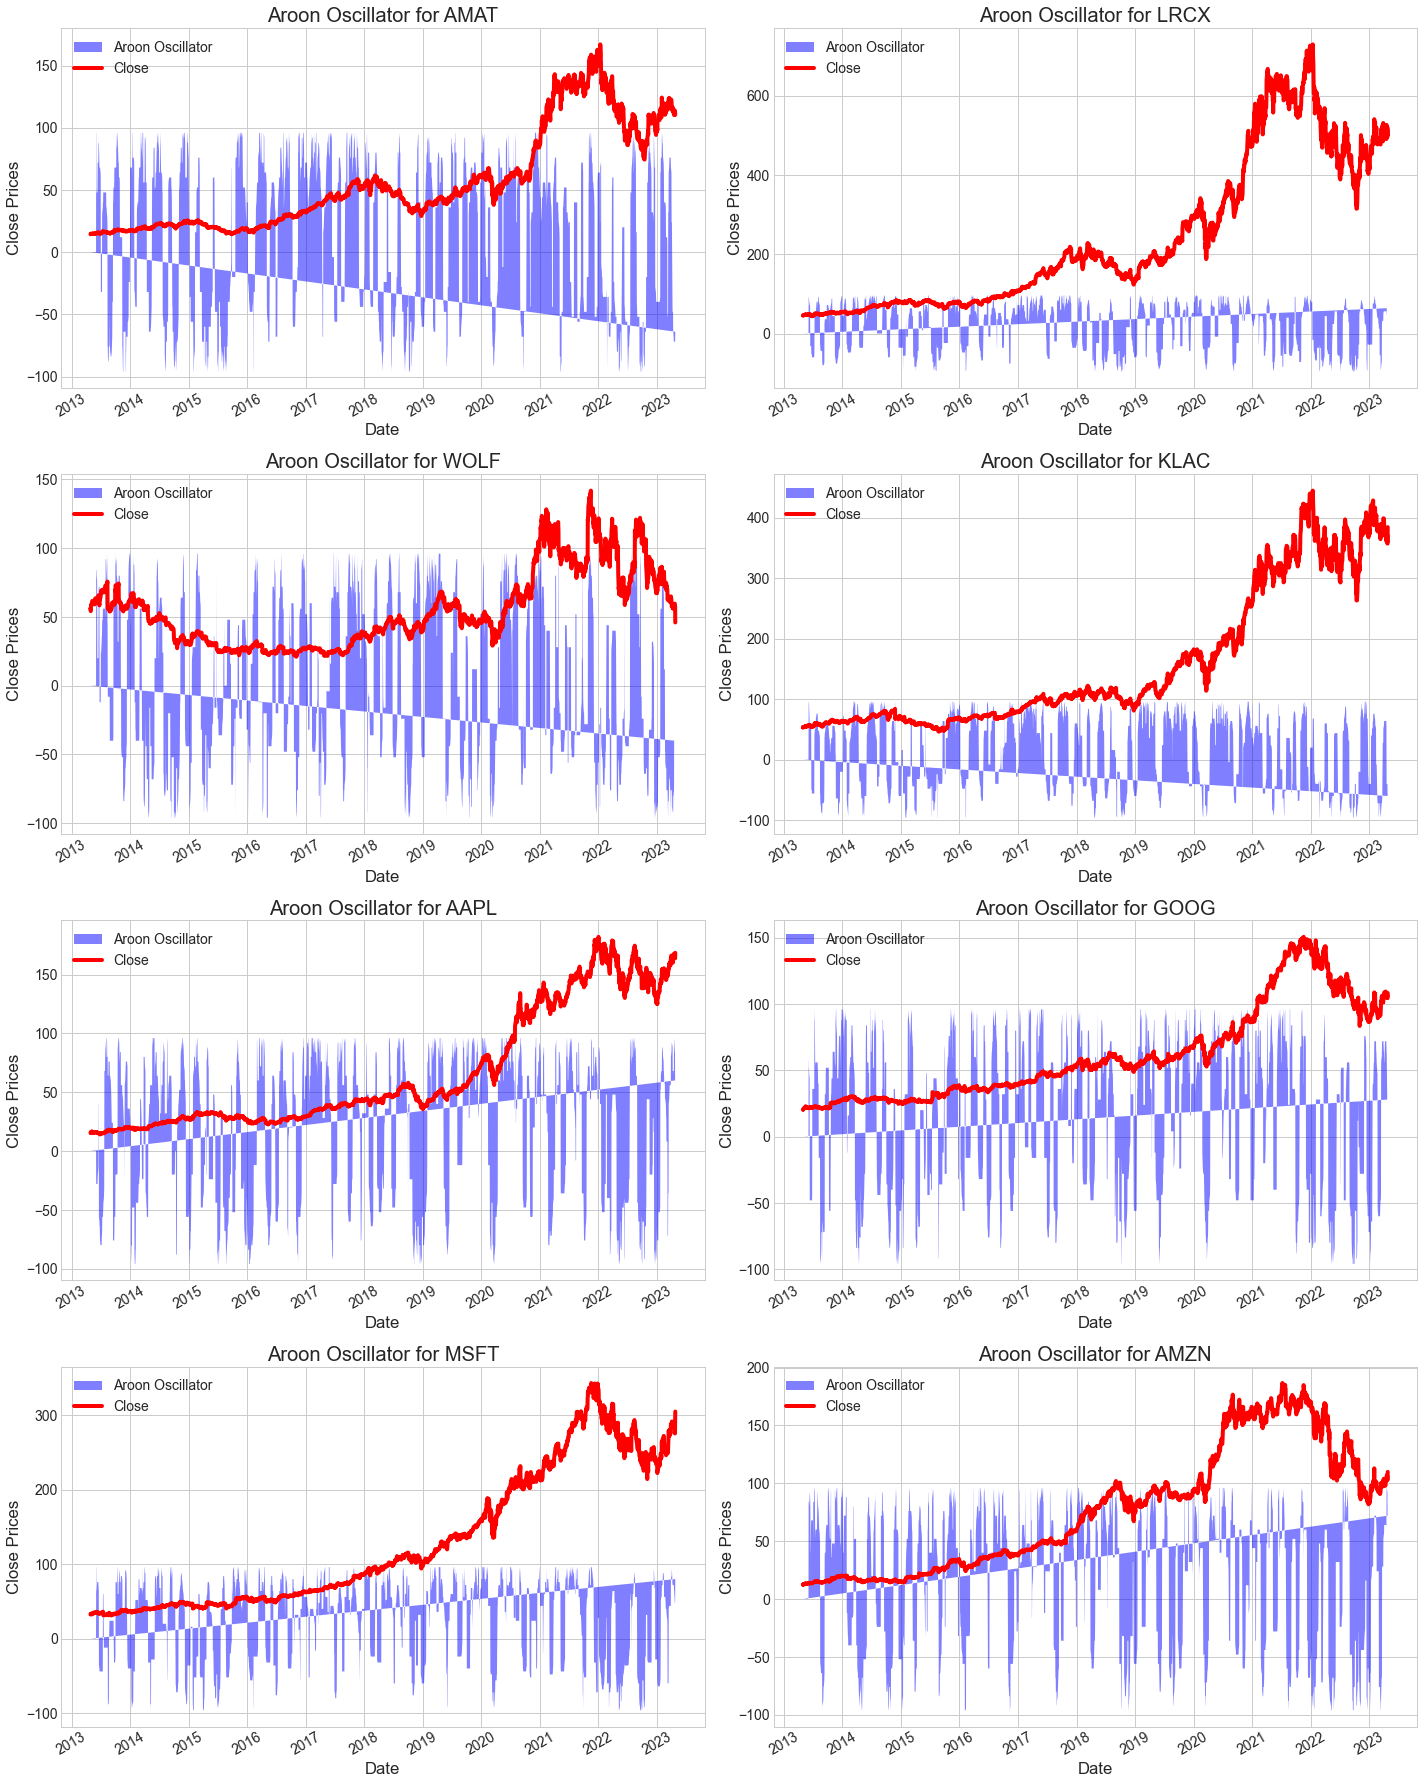

In [30]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,25))
for i in range(len(TechIndicator)):
    ax = plt.subplot(4,2,i+1)
    ax.fill(TechIndicator[i].index, TechIndicator[i]['Aroon_Oscillator'],'b', alpha = 0.5, label = "Aroon Oscillator")
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Close'], 'r', label="Close")
    ax.set_title("Aroon Oscillator for " +str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Prices")
    plt.xticks(rotation=30)
fig.tight_layout()

## Plot Price Volume Trend 

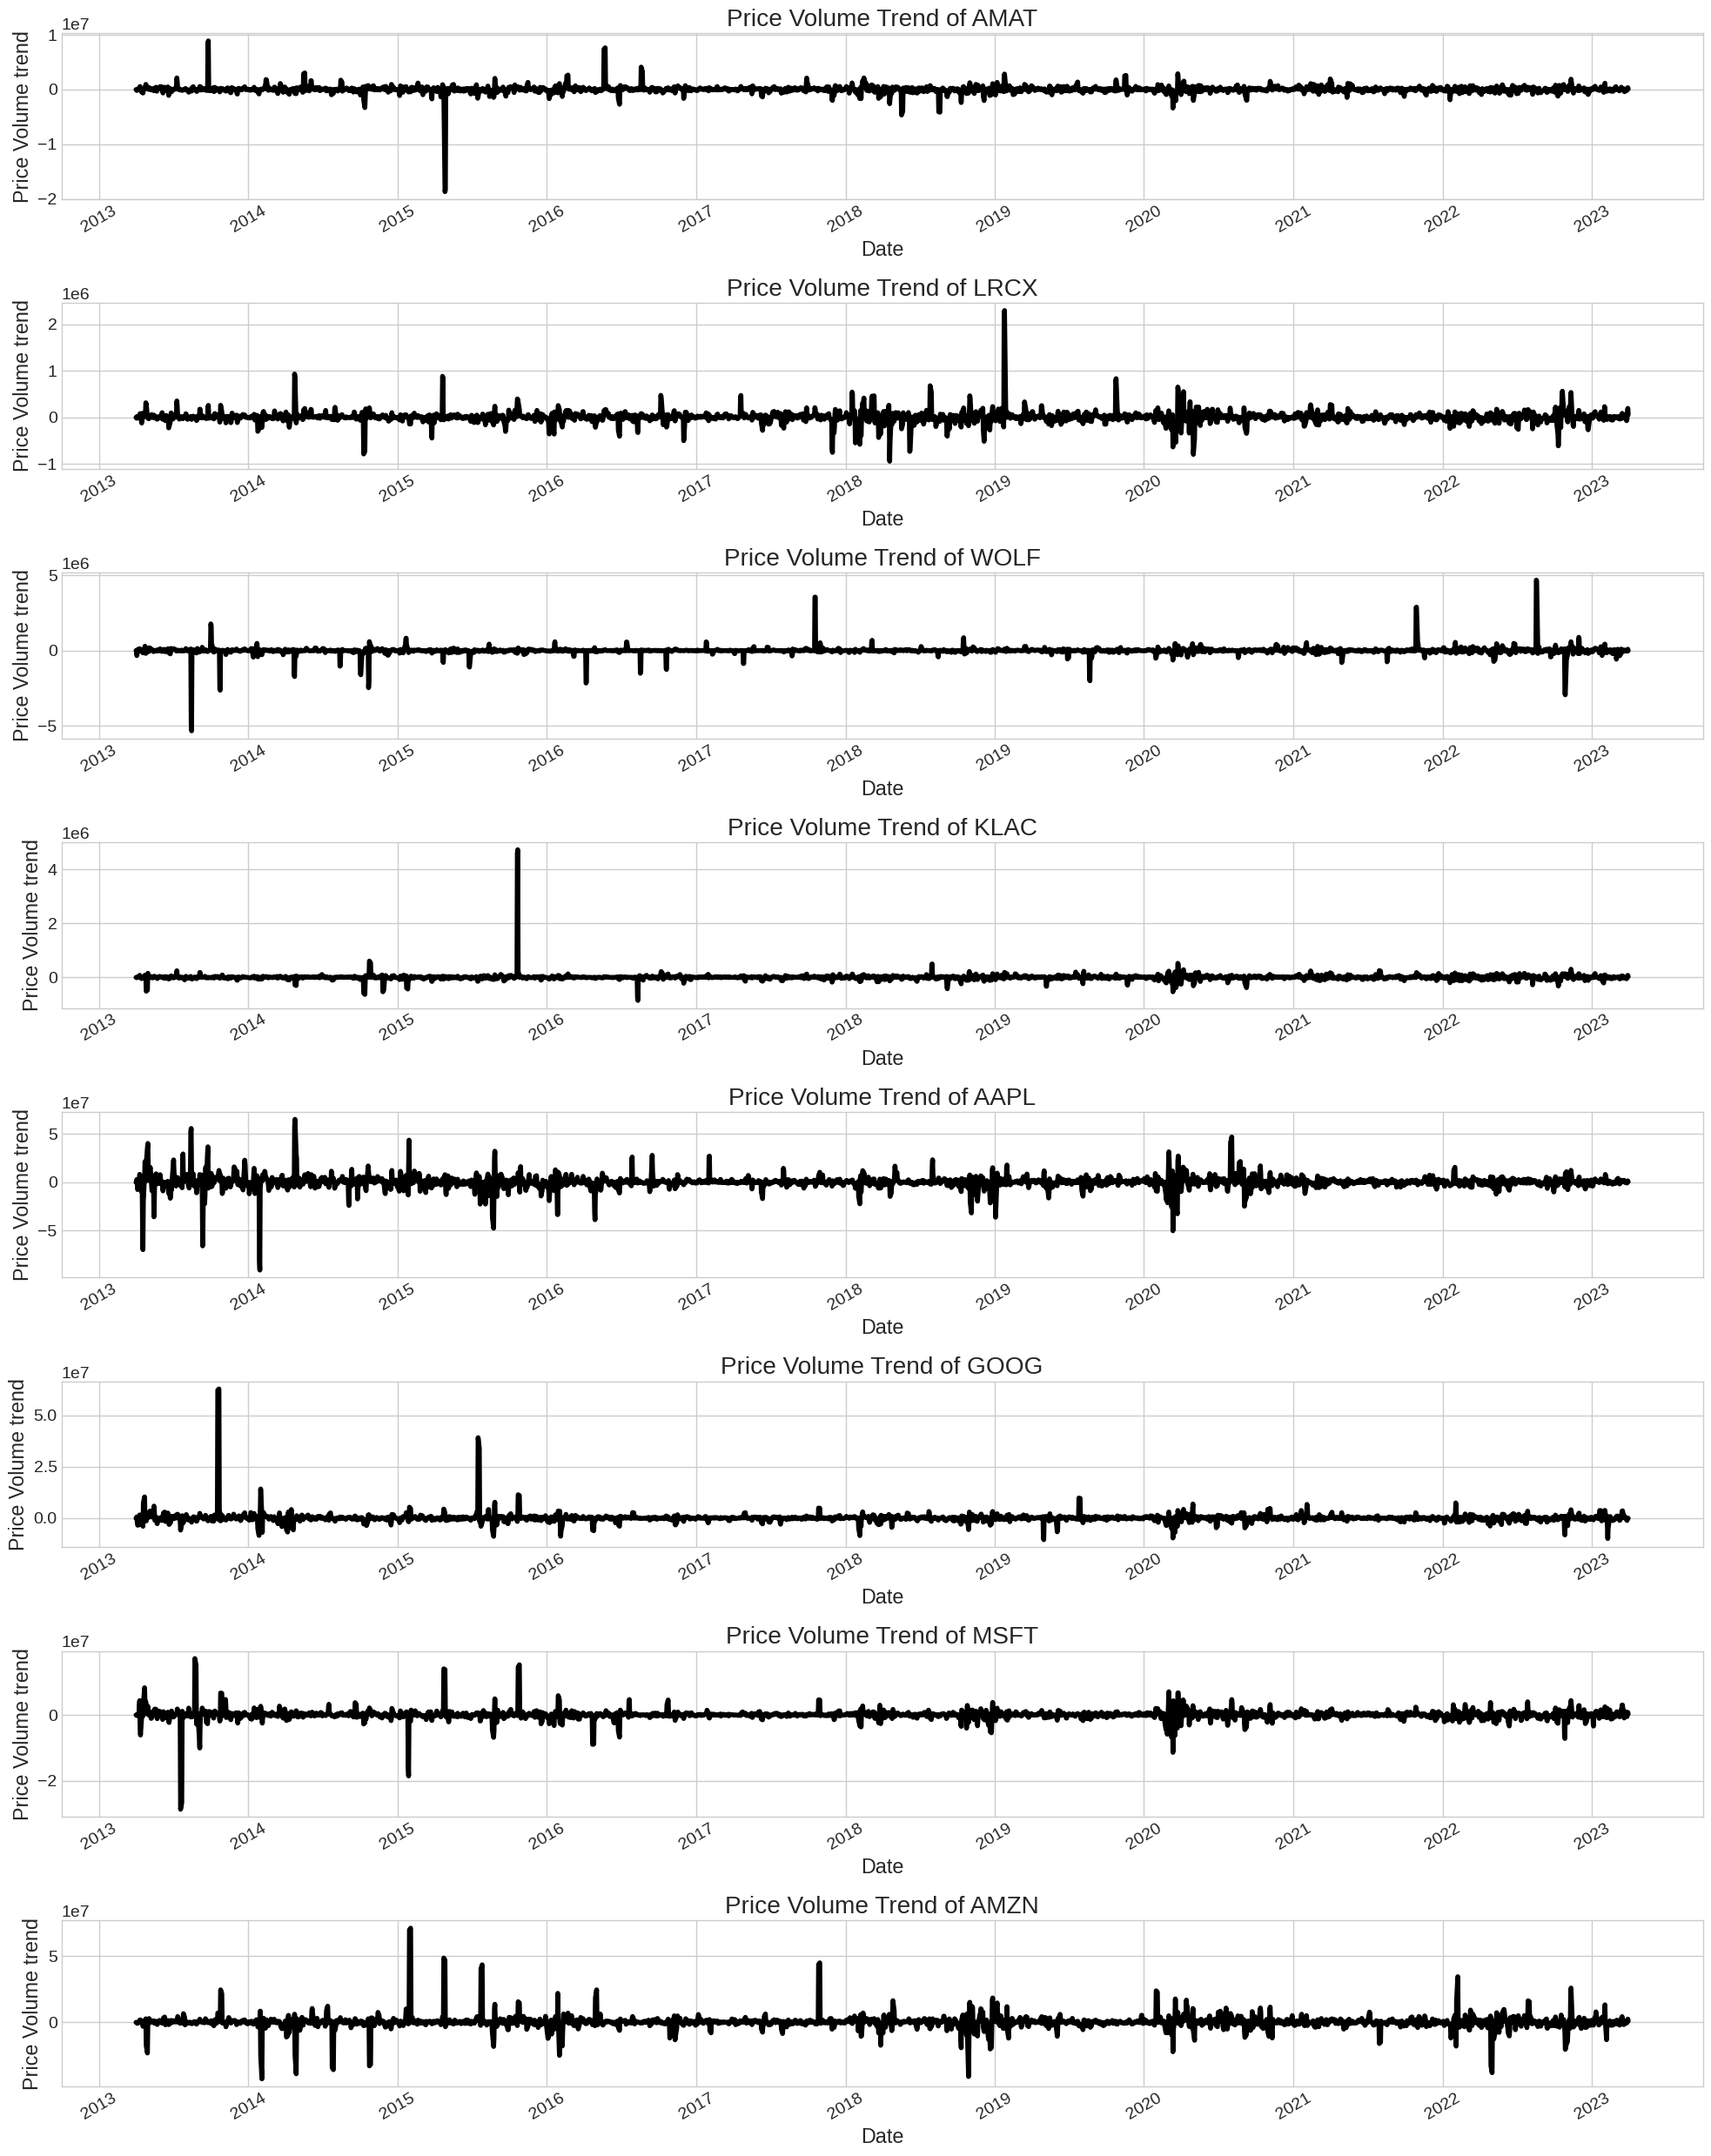

In [ ]:
fig = plt.figure(figsize=(20,25))
for i in range(len(TechIndicator)):
    ax = plt.subplot(8,1,i+1)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['PVT'], 'black')
    ax.set_title("Price Volume Trend of " +str(TechIndicator[i]['Label'][0]))
    ax.set_xlabel("Date")
    ax.set_ylabel("Price Volume trend")
    plt.xticks(rotation=30)
fig.tight_layout()

## Plot Acceleration bands


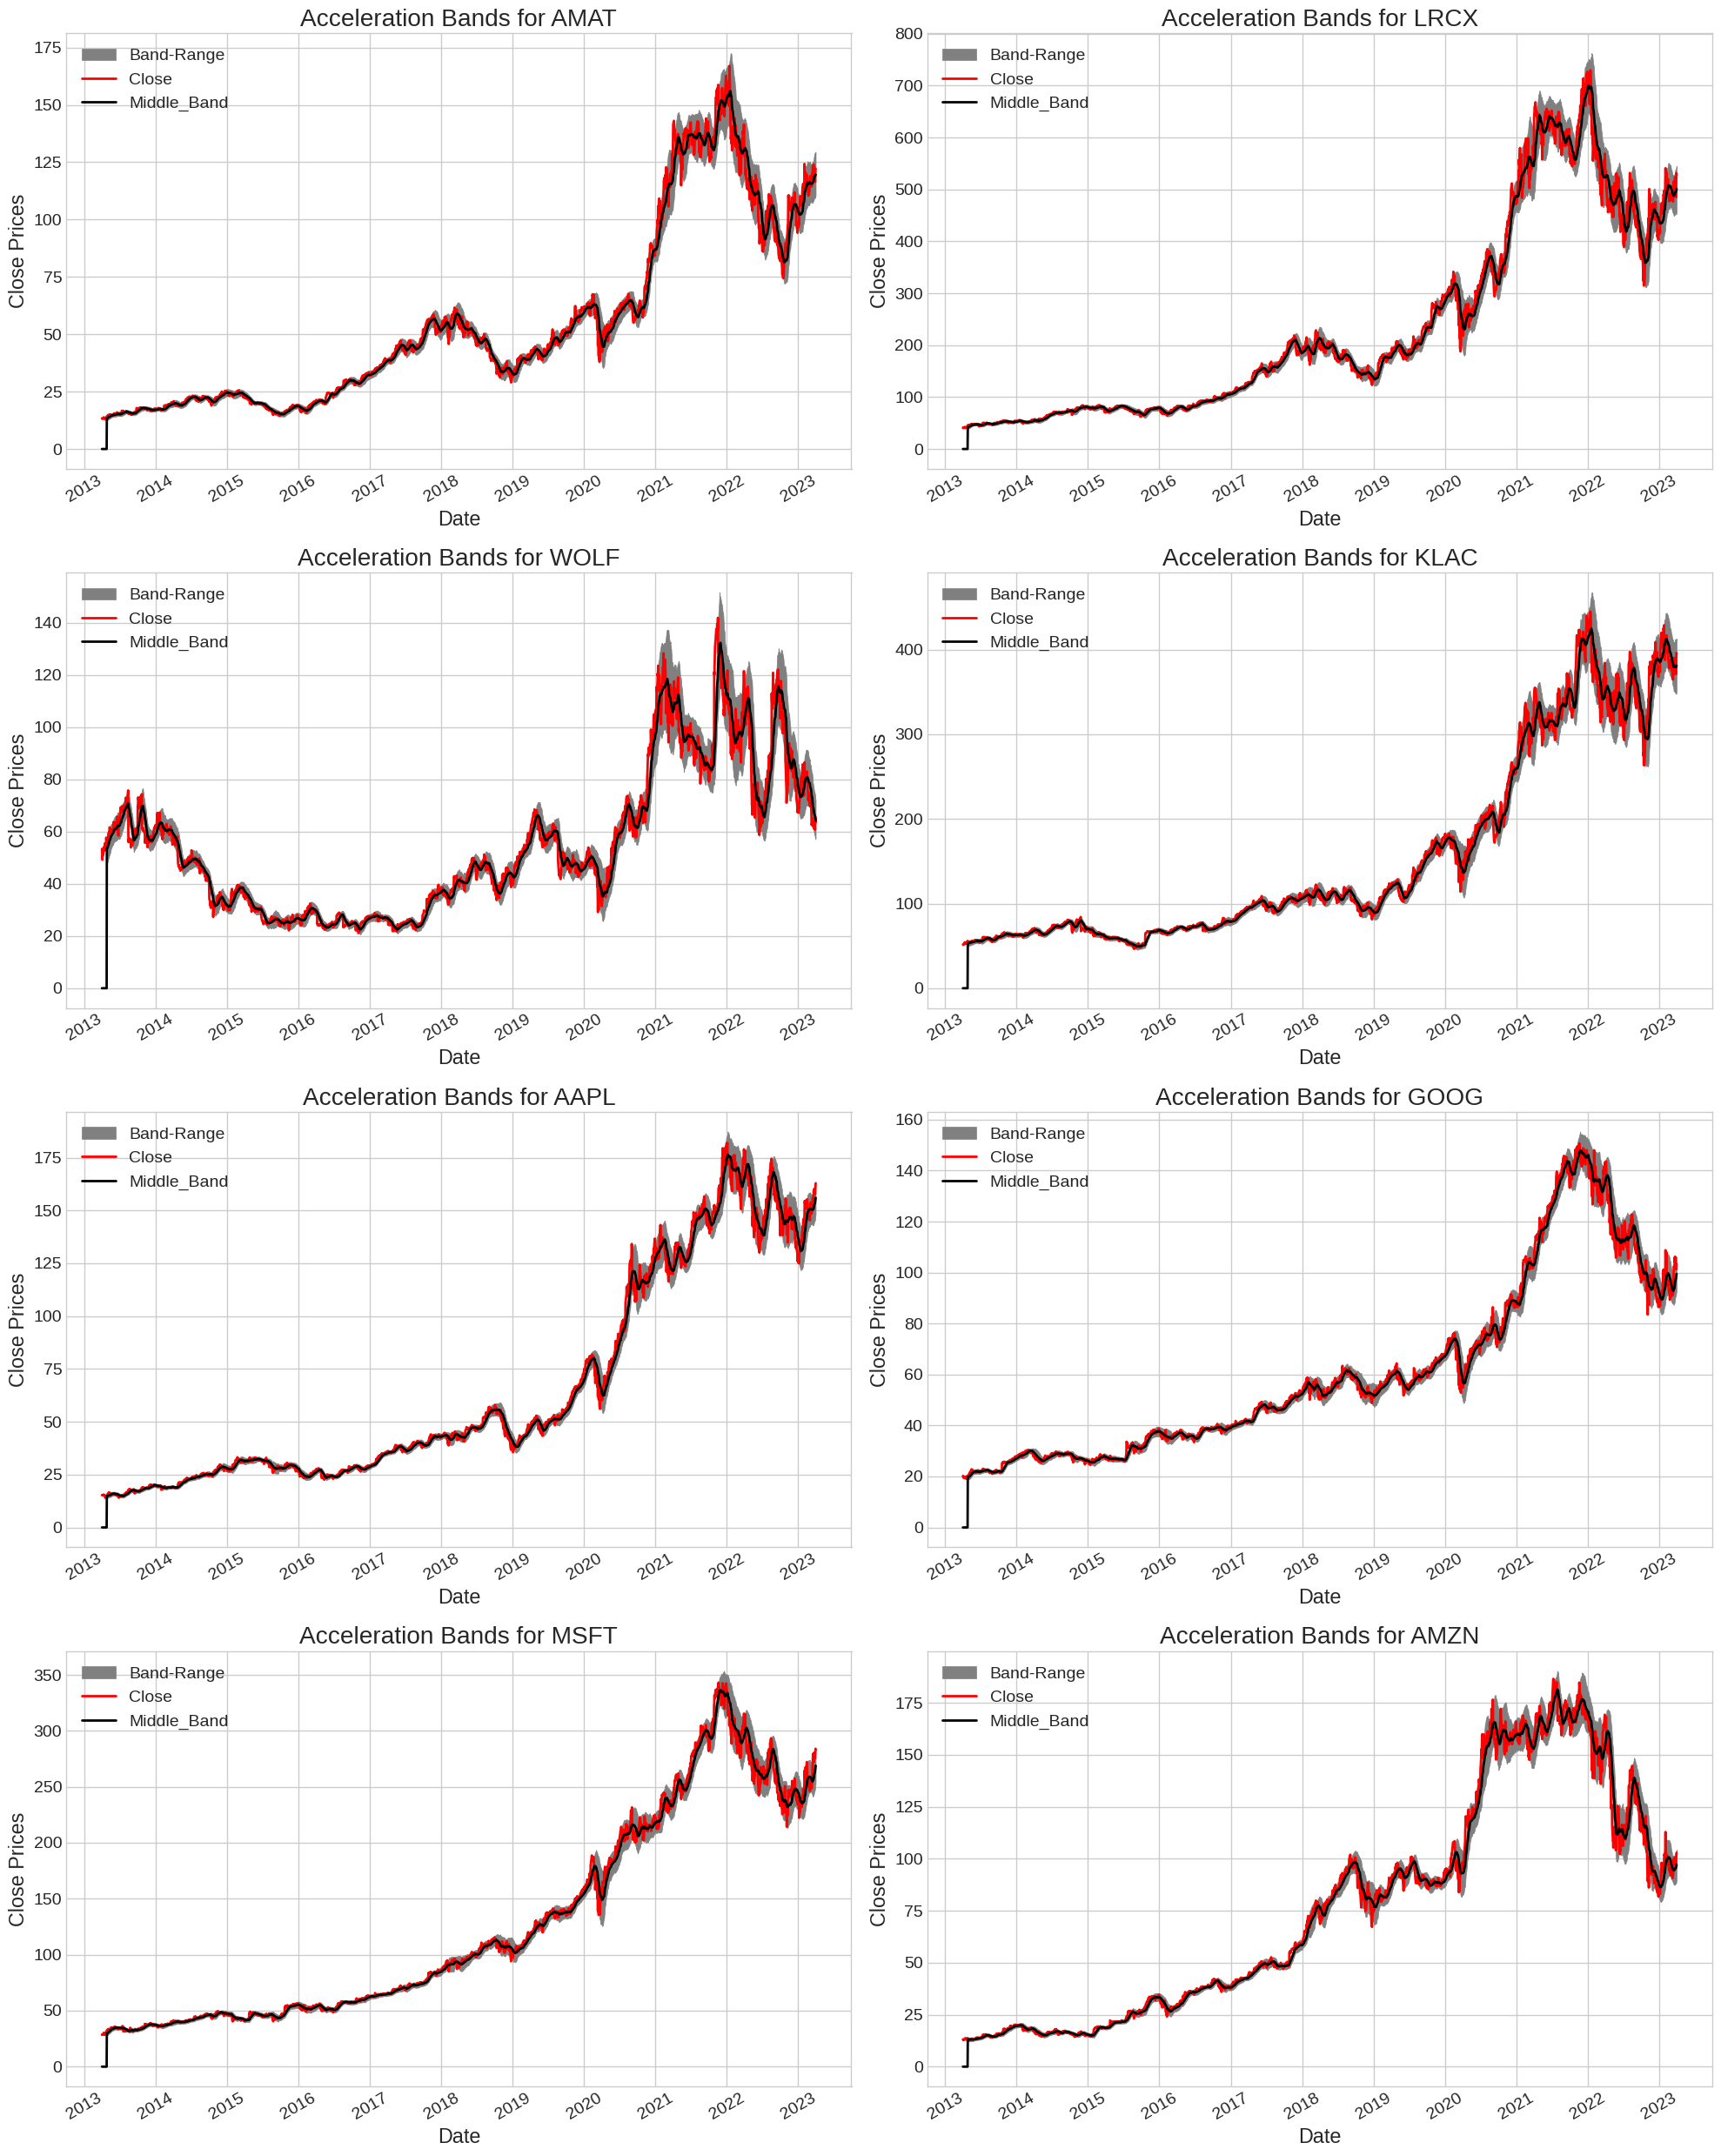

In [ ]:
fig = plt.figure(figsize=(20,25))
for i in range(len(TechIndicator)):
    ax = plt.subplot(4,2,i+1)
    ax.fill_between(TechIndicator[i].index, TechIndicator[i]['AB_Upper_Band'], TechIndicator[i]['AB_Lower_Band'], color='grey', label = "Band-Range")
    # Plot Adjust Closing Price and Moving Averages
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Close'], color='red', lw=2, label = "Close")
    ax.plot(TechIndicator[i].index, TechIndicator[i]['AB_Middle_Band'], color='black', lw=2, label="Middle_Band")
    ax.set_title("Acceleration Bands for " + str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Prices")
    plt.xticks(rotation=30)
fig.tight_layout()

# Making Predictions Using the Daily Close price
## Let's predict AMAT stock

In [6]:
# Get the stock quote
stock = 'AMAT'
df = pdr.get_data_yahoo(stock, start=start, end=end)
# Show teh data
df.tail()

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-03-27  120.750000  120.980003  118.320000  118.870003  118.870003   
2023-03-28  118.889999  119.059998  115.580002  116.400002  116.400002   
2023-03-29  118.720001  121.010002  117.360001  119.849998  119.849998   
2023-03-30  122.000000  123.379997  121.339996  122.110001  122.110001   
2023-03-31  121.519997  123.519997  121.000000  121.970001  121.970001   

             Volume  
Date                 
2023-03-27  4628200  
2023-03-28  5523800  
2023-03-29  7865300  
2023-03-30  6213100  
2023-03-31  1747142

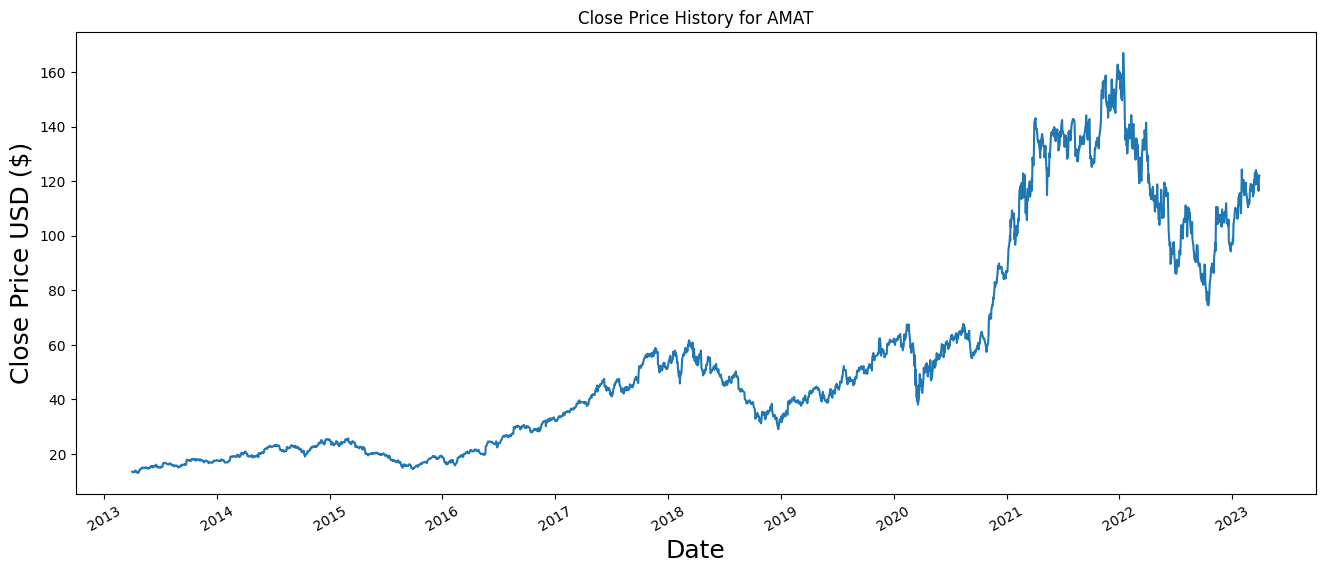

In [7]:
plt.figure(figsize=(16,6))
plt.title('Close Price History for ' + stock)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.xticks(rotation=30)
plt.show()

In [8]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .80 ))

training_data_len

2016

In [9]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00285566],
       [0.00207684],
       [0.00149273],
       ...,
       [0.69399012],
       [0.70865784],
       [0.70774923]])

In [10]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
print(len(train_data))    
print(len(x_train))
print(len(y_train))
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

2016
1956
1956


In [11]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
1956/1956 [==============================] - 25s 8ms/step - loss: 5.6376e-04 - accuracy: 0.0000e+00
Epoch 2/5
1956/1956 [==============================] - 15s 8ms/step - loss: 3.1521e-04 - accuracy: 0.0000e+00
Epoch 3/5
1956/1956 [==============================] - 15s 8ms/step - loss: 2.8879e-04 - accuracy: 0.0000e+00
Epoch 4/5
1956/1956 [==============================] - 16s 8ms/step - loss: 2.0220e-04 - accuracy: 0.0000e+00
Epoch 5/5
1956/1956 [==============================] - 15s 8ms/step - loss: 2.4678e-04 - accuracy: 0.0000e+00


In [12]:
# Create the testing data set

test_data = scaled_data[training_data_len - 60: , :]
print(len(test_data))
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

564
16/16 [==============================] - 1s 5ms/step


7.105468837684983

<ipython-input-13-615b4a569934>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


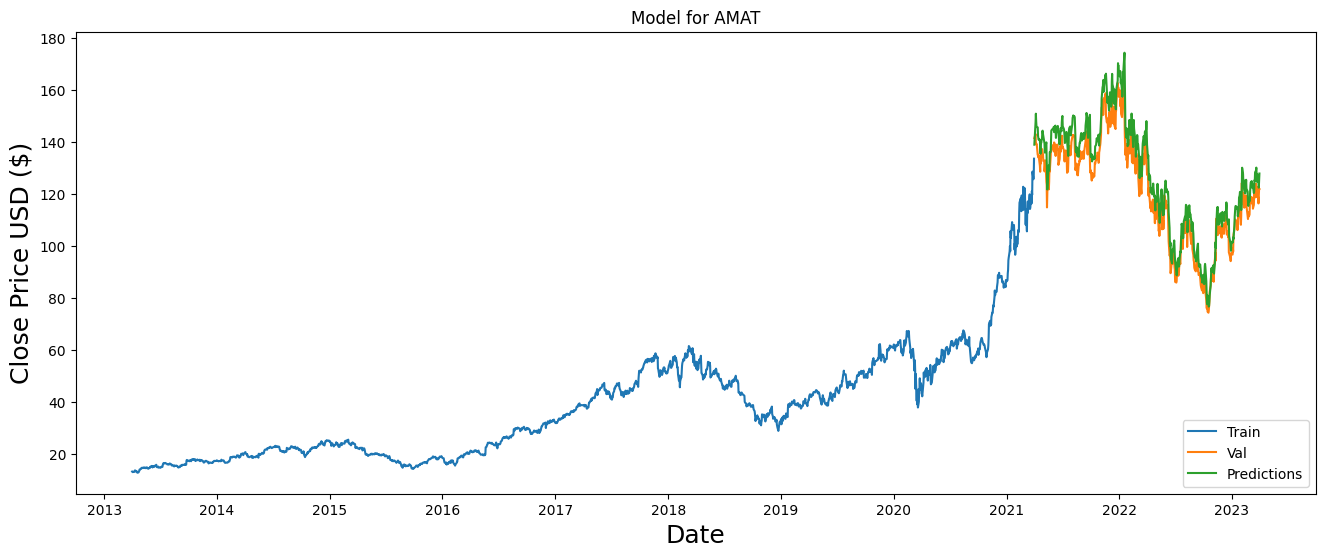

In [13]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model for '  + stock)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.xticks(rotation=30)
plt.show()

In [14]:
# Show the valid and predicted prices
valid.head()



Close  Predictions
Date                               
2021-04-01  141.520004   138.981064
2021-04-05  143.050003   147.576141
2021-04-06  139.539993   150.892944
2021-04-07  139.139999   147.855850
2021-04-08  139.350006   146.004211

In [15]:
valid.tail()

Close  Predictions
Date                               
2023-03-27  118.870003   126.113167
2023-03-28  116.400002   124.869614
2023-03-29  119.849998   122.445175
2023-03-30  122.110001   124.865166
2023-03-31  121.970001   127.893478

<ipython-input-18-7472659437d7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = predictions


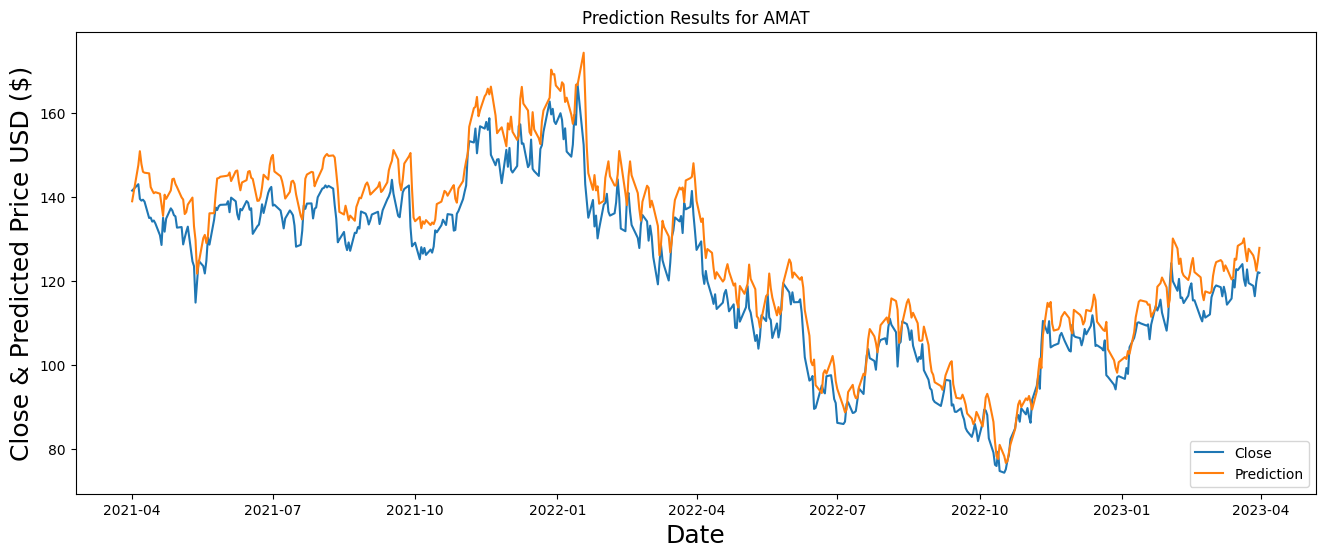

In [18]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Prediction'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Prediction Results for '  + stock)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close & Predicted Price USD ($)', fontsize=18)
plt.plot(valid['Close'])
plt.plot(valid['Prediction'])
plt.legend(['Close','Prediction'], loc='lower right')
plt.show()

# Use different approach

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [27]:

stock = 'AMAT'
dataset = pdr.get_data_yahoo(stock, start=start, end=end)

dataset = dataset.reset_index()
dataset['Date'] = pd.to_datetime(dataset.Date,format='%Y-%m-%d')
dataset.index = dataset['Date']
dataset.head()

[*********************100%***********************]  1 of 1 completed


Date   Open   High    Low  Close  Adj Close    Volume
Date                                                                  
2013-04-01 2013-04-01  13.48  13.49  13.27  13.36  11.490364  11026400
2013-04-02 2013-04-02  13.46  13.46  13.19  13.24  11.387156   8535600
2013-04-03 2013-04-03  13.24  13.24  13.02  13.15  11.309752  14428100
2013-04-04 2013-04-04  13.10  13.24  13.03  13.22  11.369952   7399800
2013-04-05 2013-04-05  13.02  13.22  12.91  13.20  11.352752  10349000

In [30]:
dataset = dataset.sort_index(ascending=True, axis=0)
dataset2 = pd.DataFrame(index=range(0,len(dataset)),columns=['Date', 'Close'])

for i in range(0,len(dataset)):
    dataset2['Date'][i] = dataset['Date'][i]
    dataset2['Close'][i] = dataset['Close'][i]
    
dataset2.index = dataset2.Date
dataset2.drop('Date', axis=1, inplace = True)

dataset3 = dataset2.values 

train = dataset3[:training_data_len]
valid = dataset3[training_data_len:]
#print(train)
#print(valid)

In [31]:

# puts everything between (0,1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset3)
#print(scaled_data)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [34]:
model = Sequential()
model.add(LSTM( units=1000, return_sequences = True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=1000))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

1956/1956 - 54s - loss: 0.0012 - 54s/epoch - 28ms/step


In [39]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
#y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

closing_price = model.predict(x_test)
closing_price = scaler.inverse_transform(closing_price)
#print(X_test.shape)

train = dataset2[:training_data_len]
valid = dataset2[training_data_len:]
valid['Predictions'] = closing_price

16/16 [==============================] - 0s 27ms/step


<ipython-input-39-f8e30692b62c>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


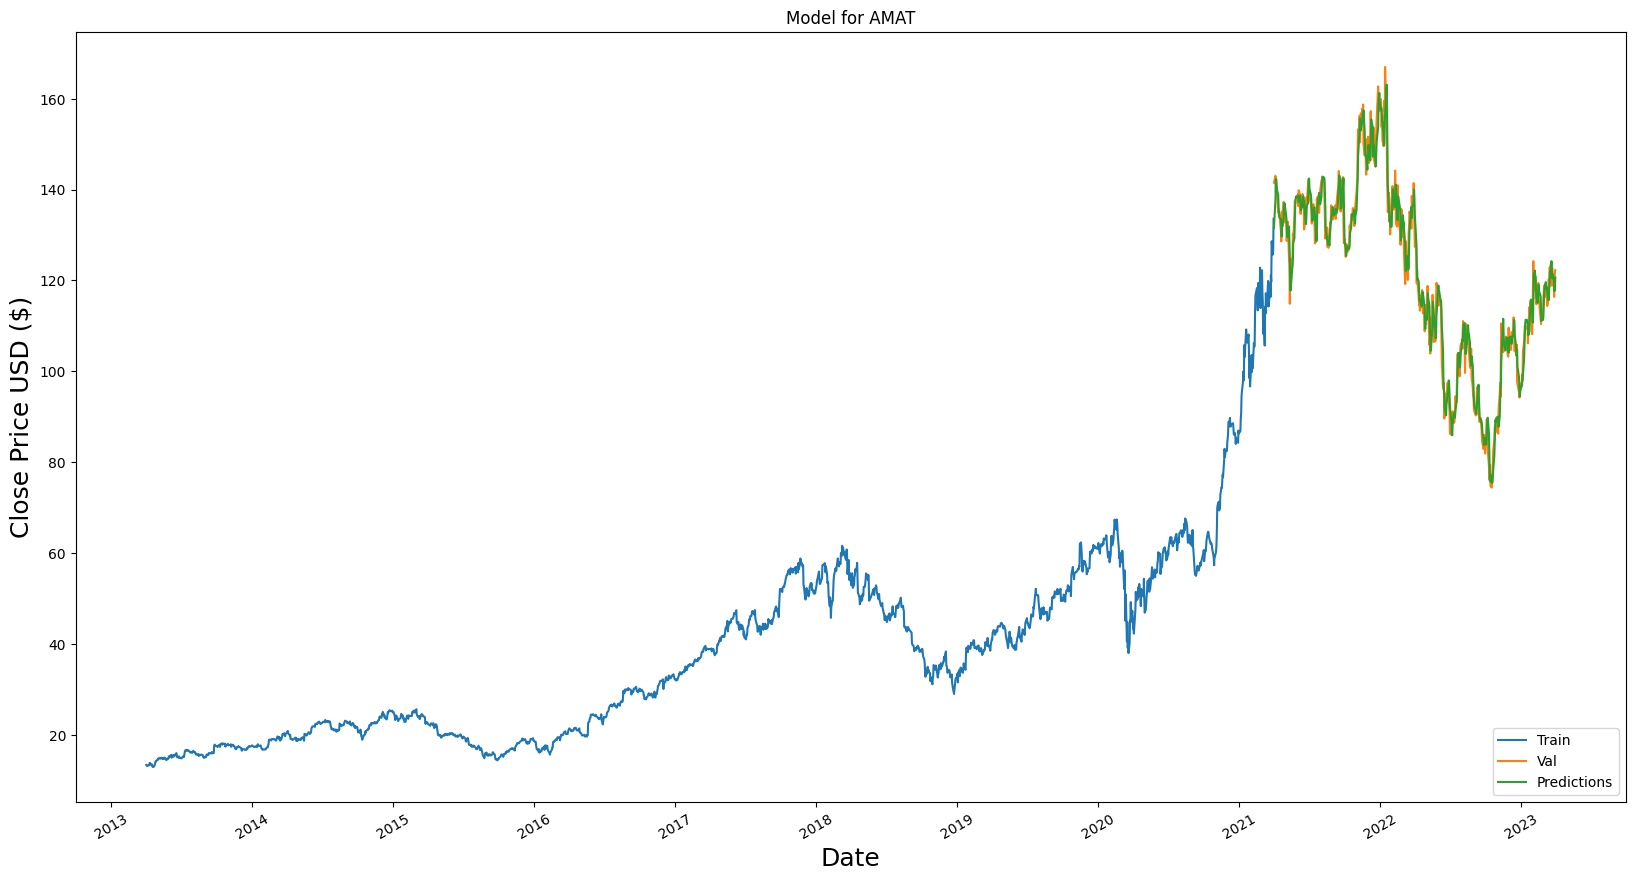

In [40]:
plt.figure(figsize=(20,10))
plt.title('Model for '  + stock)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.xticks(rotation=30)
plt.show()

In [41]:
valid.head()

Close  Predictions
Date                               
2021-04-01  141.520004   131.586243
2021-04-05  143.050003   138.041382
2021-04-06  139.539993   142.352661
2021-04-07  139.139999   142.241196
2021-04-08  139.350006   141.087372

In [42]:
valid.tail()

Close  Predictions
Date                               
2023-03-27  118.870003   120.268402
2023-03-28  116.400002   119.482704
2023-03-29  119.849998   117.660210
2023-03-30  122.110001   118.644295
2023-03-31  122.285004   120.666000

<ipython-input-44-f35a25d10c06>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = predictions


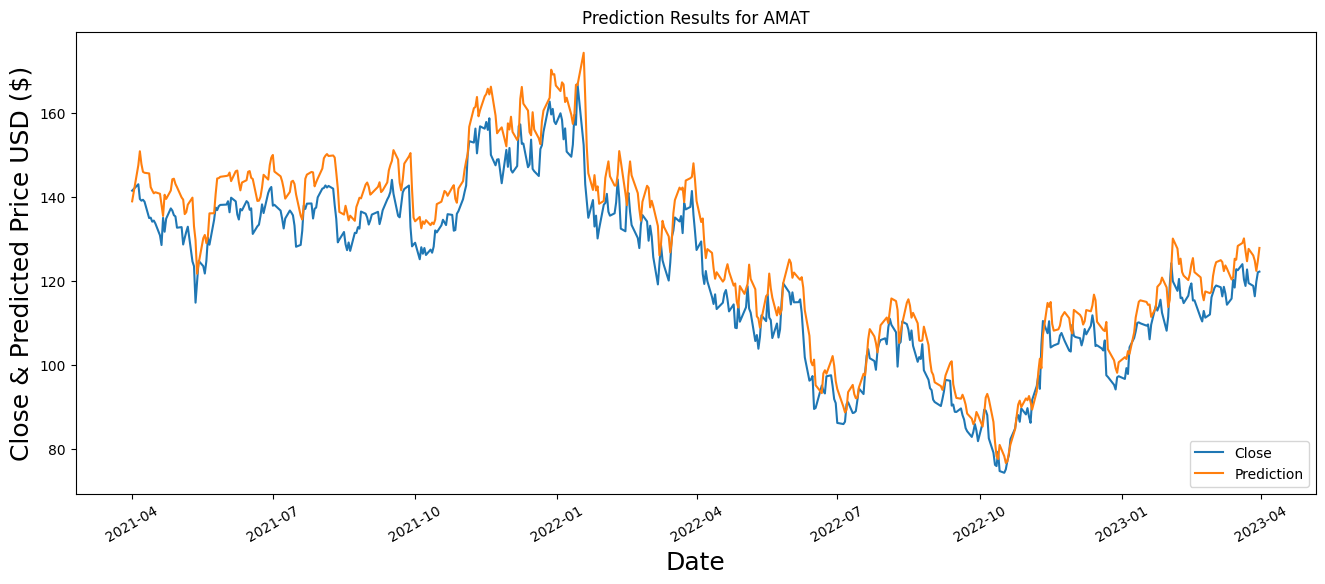

In [44]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Prediction'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Prediction Results for '  + stock)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close & Predicted Price USD ($)', fontsize=18)
plt.plot(valid['Close'])
plt.plot(valid['Prediction'])
plt.legend(['Close','Prediction'], loc='lower right')
plt.xticks(rotation=30)
plt.show()